In [1]:
from sklearn.cluster import KMeans
import numpy as np
from fwsa import fwsa
from fwsa_utils import weighted_distance


ImportError: cannot import name 'fwsa' from 'fwsa' (d:\My_codes\unsupervised_feature_selection\Mixed_intelligent_kmeans_and_FWSA\simple\fwsa.py)

In [ ]:
def normalizer(data):
    return (data - np.mean(data,axis=0)) / (np.max(data, axis=0) - np.min(data, axis=0))

In [ ]:
def intelligent_kmeans(X, desire_number_k = 3):
    """Intelligent KMeans that actually is a KMeans with a smart initialization of centers 
    and also it determines an upper bound for the number of clusters that we can have in a dataset.

    Args:
        X (_type_): Input  data
        desire_number_k (int, optional): . Defaults to 3.

    Returns:
        _type_: It returns a fitted Kmeans object based on the input data X, the number of desired clusters,
          and also it gives us the centers that has been fined based on Intelligent KMeans.
    """

    X_copy = X.copy()
    n_samples = X.shape[0] # Number of samples
    n_features = X.shape[1] # Number of features

    weights = (1/n_features) * np.ones(n_features).squeeze()# --> initial weights

    i_clusters = 0 # Number of clusters that we have found
    #1
    c = np.mean(X, axis=0) # c is not going to change in the loop
    Z = {}

    while True:

        #2 D is the list of Distances to the Center of all data
        D = weighted_distance(c, X, weights)
        # D = euclidean(c, X)
        ind_t = np.argmax(D) # the farthest point to c
        t = X[ind_t]

        #3
        cluster_t_indexes = []
        while True:
            # D_clusters = [(a,b) for a,b in zip(euclidean(c, X), euclidean(t, X))]
            D_clusters = [(a,b) for a,b in zip(weighted_distance(c, X,weights), weighted_distance(t, X,weights))]

            clusters = np.argmin(D_clusters, axis=1)

            new_cluster_t_indexes = list(np.where(clusters == 1)[0])

            t = np.mean(X[new_cluster_t_indexes], axis=0)
            
            # counter += 1
            if cluster_t_indexes != new_cluster_t_indexes:
                cluster_t_indexes = new_cluster_t_indexes
                continue
            else:
                break
            
        #4
        theta = 1
        cluster_t_cardinality =len(cluster_t_indexes)
        if cluster_t_cardinality >= theta:
            Z[i_clusters] = (t, cluster_t_cardinality)
            i_clusters += 1 
        # else:
        #     print('Cardinality for Cluster {t} is less than Theta ({theta})')
        #     break # What should we do here? Remove cluster_t? 

        #5 Residual indexes, after removing the cluster_t_indexes
        res_indexes = list(set(np.arange(X.shape[0])) - set(cluster_t_indexes))
        X = X[res_indexes]

        #6
        if len(res_indexes) > 0:
            continue
        else:
            break
    #6.5

    deducted_z = [v for k, v in Z.items()]
    deducted_z = sorted(deducted_z, key=lambda x: x[-1], reverse = True)
    deducted_z = deducted_z[:desire_number_k]
    deducted_z = [zz[0] for zz in deducted_z]
    deducted_z = np.array(deducted_z)
        
    #7

    # Specify the number of clusters (K)
    k = len(deducted_z)
    # init_centers = [v[0] for k,v in Z.items()]

    # Create the KMeans object
    kmeans = KMeans(n_clusters=desire_number_k, init=deducted_z)

    # Fit the model to the data
    fit_model = kmeans.fit(X_copy)

    return fit_model, deducted_z


c:\Users\Mehrdad\anaconda3\envs\ai\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Mehrdad\anaconda3\envs\ai\lib\site-packages\sklearn\cluster\_kmeans.py:1412: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Mehrdad\anaconda3\envs\ai\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.7008666982225341


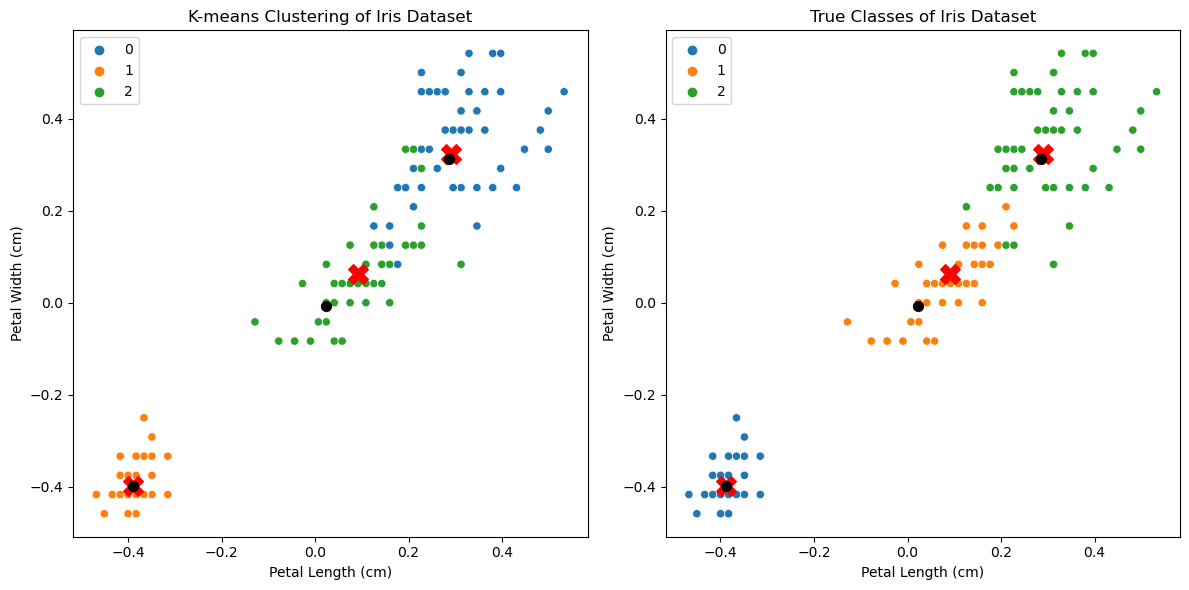

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.metrics import adjusted_rand_score
# Load the Iris dataset
iris = load_iris()

# Access the features (X) and target (y) data
X = iris.data
y = iris.target

import numpy as np
def normalizer(data):
    return (data - np.mean(data,axis=0)) / (np.max(data, axis=0) - np.min(data, axis=0))
X = normalizer(X)


fit_ikmeans, deducted_z = intelligent_kmeans(X, 3)
# Get the cluster centers and the labels for each data point
cluster_centers = fit_ikmeans.cluster_centers_
labels = fit_ikmeans.labels_
a_r_s = adjusted_rand_score(y, labels )
print(a_r_s)



fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Subplot 1: K-means Clustering
sns.scatterplot(x=X[:, 2], y=X[:, 3], hue=labels, palette='tab10', ax=axes[0])
axes[0].scatter(cluster_centers[:, 2], cluster_centers[:, 3], marker='X', color='red', s=200)
axes[0].scatter(deducted_z[:, 2], deducted_z[:, 3], marker='o', color='black', s=50)
axes[0].set_xlabel('Petal Length (cm)')
axes[0].set_ylabel('Petal Width (cm)')
axes[0].set_title('K-means Clustering of Iris Dataset')

# Subplot 2: True Classes
sns.scatterplot(x=X[:, 2], y=X[:, 3], hue=y, palette='tab10', ax=axes[1])
axes[1].scatter(cluster_centers[:, 2], cluster_centers[:, 3], marker='X', color='red', s=200)
axes[1].scatter(deducted_z[:, 2], deducted_z[:, 3], marker='o', color='black', s=50)
axes[1].set_xlabel('Petal Length (cm)')
axes[1].set_ylabel('Petal Width (cm)')
axes[1].set_title('True Classes of Iris Dataset')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Loading Data

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.datasets import load_iris

In [3]:
working_directory = Path.cwd()
working_directory


WindowsPath('d:/My_codes/unsupervised_feature_selection/Mixed_intelligent_kmeans_and_FWSA/simple')

In [14]:
X_selected_dataset_directory = working_directory / 'data'/ 'Renato_data'/ 'X_BreastCancer.csv'
y_selected_dataset_directory = working_directory / 'data'/ 'Renato_data'/ 'y_BreastCancer.csv'

df_X = pd.read_csv(X_selected_dataset_directory,header=None)
x = df_X.astype(float).values

df_y = pd.read_csv(y_selected_dataset_directory,header=None)
y = df_y.astype(float).values.reshape(-1,)

In [15]:
y

array([1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1.,
       1., 2., 1., 2., 2., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1.,
       1., 1., 2., 1., 2., 2., 1., 2., 2., 2., 2., 1., 2., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 1., 2.,
       2., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2.,
       1., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 1., 1., 1., 2., 1.,
       1., 1., 1., 2., 2., 2., 1., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 2., 2.,
       1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1.,
       1., 1., 1., 2., 2., 2., 1., 2., 1., 2., 1., 1., 1., 2., 2., 1., 2.,
       2., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1.,
       1., 2., 2., 1., 1., 1., 2., 2., 1., 2., 2., 2., 1., 1., 2., 1., 1.,
       2., 2., 2., 2., 1.

In [ ]:
selection = input('Which data?:only Enter the corresponding number\n 3-cancer\n 4-car \n 5-ecoli \n 6-heart \n 7-ionosphere\n 8-iris \n 10-teaching_assistant \n 11-tic+tac+toe \n 12-wine\n')

In [24]:
def dataset_selection():
    working_directory = Path.cwd()

    while(True):
            
        selection = input('Which data?:only Enter the corresponding number\n 3-cancer\n 4-car \n 5-ecoli \n 6-heart \n 7-ionosphere\n 8-iris \n 10-teaching_assistant \n 11-tic+tac+toe \n 12-wine\n')
        if selection == '3':
            # Load the CSV file using Pandas
            selected_dataset_directory = working_directory / 'data'/ '3-cancer.csv'
            df = pd.read_csv(selected_dataset_directory)

            # Separate the target variable (y) from the DataFrame
            y = df.iloc[:, -1].values

            # Separate the input features (X) from the DataFrame
            x = df.iloc[:, :-1].values
            break
        elif selection == '4':
            # Load the CSV file using Pandas
            selected_dataset_directory = working_directory / 'data'/ '4-car.csv'
            df = pd.read_csv(selected_dataset_directory)

            y = df.iloc[:, -1].values
            x = df.iloc[:, :-1].values
            break

        elif selection == '5':
            # Load the CSV file using Pandas
            selected_dataset_directory = working_directory / 'data'/ '5-ecoli.csv'
            df = pd.read_csv(selected_dataset_directory)

            y = df.iloc[:, -1].values
            x = df.iloc[:, :-1].values
            break

        elif selection == '6':
            # Load the CSV file using Pandas
            selected_dataset_directory = working_directory / 'data'/ '6-heart.csv'
            df = pd.read_csv(selected_dataset_directory)

            y = df.iloc[:, -1].values
            x = df.iloc[:, :-1].values
            break
        
        elif selection == '7':
            # Load the CSV file using Pandas
            selected_dataset_directory = working_directory / 'data'/ '7-ionosphere.csv'
            df = pd.read_csv(selected_dataset_directory)

            y = df.iloc[:, -1].values
            x = df.iloc[:, :-2].values
            break

        elif selection == '8':
            # Load the Iris dataset
            iris = load_iris()

            # Access the features (X) and target (y) data
            X = iris.data
            y = iris.target

            break

        elif selection == '10':
            # Load the CSV file using Pandas
            selected_dataset_directory = working_directory / 'data'/ '10-teaching_assistant.csv'
            df = pd.read_csv(selected_dataset_directory)

            y = df.iloc[:, -1].values
            x = df.iloc[:, :-1].values
            break

        elif selection == '11':
            # Load the CSV file using Pandas
            selected_dataset_directory = working_directory / 'data'/ '11-tic+tac+toe.csv'
            df = pd.read_csv(selected_dataset_directory)

            y = df.iloc[:, -1].values
            x = df.iloc[:, :-1].values
            break

        elif selection == '12':
            # Load the CSV file using Pandas
            selected_dataset_directory = working_directory / 'data'/ '12-wine.csv'
            df = pd.read_csv(selected_dataset_directory)

            y = df.iloc[:, -1].values
            x = df.iloc[:, :-1].values
            break
        else:
            print("Invalid option")
    return x,y

In [26]:
x,y = dataset_selection()

In [3]:
from pathlib import Path

parent_dir = Path.cwd()
parent_dir


WindowsPath('d:/My_codes/unsupervised_feature_selection/Mixed_intelligent_kmeans_and_FWSA/simple')